In [1]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from python_files.maxent import MaxEnt
import python_files.densities as d

from scipy.stats import lognorm

In [ ]:

def f_SkewKurt(x, k):
    return np.array([x**i for i in range(1, k+1)])

def mean_lognorm(mu, s2):
    return np.exp(mu + s2/2)

def var_lognorm(mu, s2):
    return (np.exp(s2) - 1)*np.exp(2*mu + s2)

def nth_moment_lognormal(n,mu,s2):
    return np.exp(n*mu + n**2 * s2/2)
    
def nth_moment_lognormal_standardized(n,mu,s2):
    if(n==1):
        return 0
    if(n==2):
        return 1
    if(n==3):
        return (np.exp(s2)+2)*np.sqrt(np.exp(s2)-1) # skewness
    if(n==4):
        ex_s = np.exp(s2)
        return ex_s**4 + 2*ex_s**3 + 3*ex_s**2 - 3 # kurtosis


def b_SkewKurt_lognormal(mu, s2, k):
    return np.array([nth_moment_lognormal(n,mu,s2) for n in range(1, k+1)])

def b_SkewKurt_lognormal_standardized(mu, s2):
    return np.array([nth_moment_lognormal_standardized(n,mu,s2) for n in range(1,5)])

def pdf_lognorm(x,mu,s2):
    return  lognorm.pdf(x,
                        s=s2,
                        loc=0,
                        scale=np.exp(mu)) 

# def lambda_actual_lognormal(mu, s2):
#     return np.array([-1 + mu/s2, -0.5/s2])


181.15220369401933


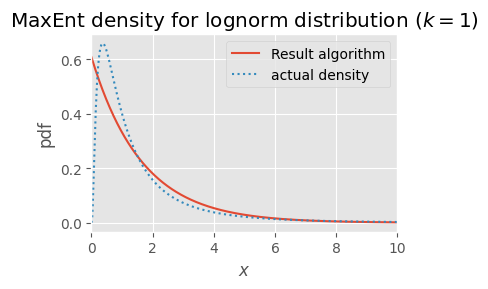

Lagrange parameters: [-0.60653066]


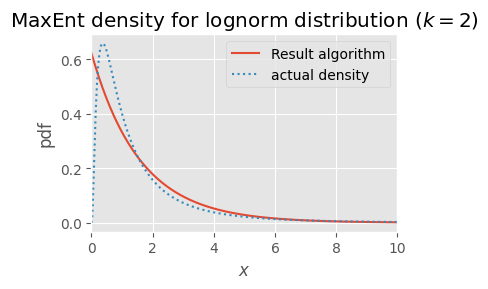

Lagrange parameters: [-0.63172735  0.00318493]


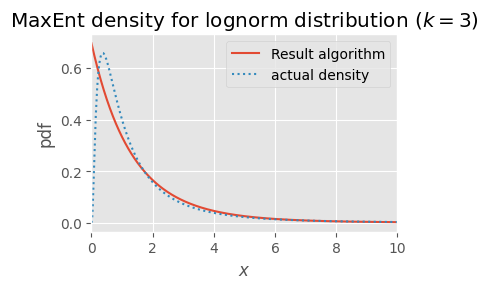

Lagrange parameters: [-7.58766805e-01  2.05888316e-02 -1.97255391e-04]


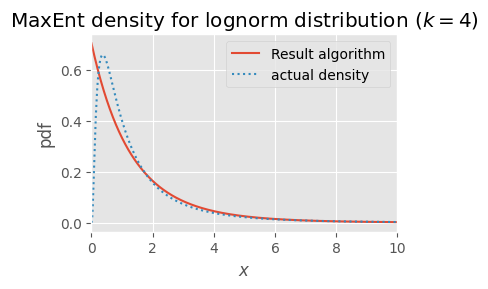

Lagrange parameters: [-7.73411493e-01  2.33306870e-02 -3.03730301e-04  1.08433686e-06]


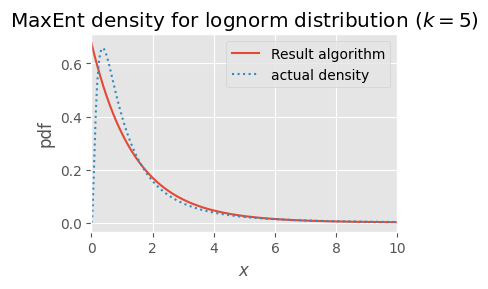

Lagrange parameters: [-7.08126737e-01  6.23868915e-03  8.14376033e-04 -2.12556909e-05
  9.20815858e-08]
The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = 216.079
  Lambda_2 = -82.267
  Lambda_3 = 4.738
  Lambda_4 = -0.108
  Lambda_5 = 0.001
  Lambda_6 = -0.000
  Lambda_7 = 0.000


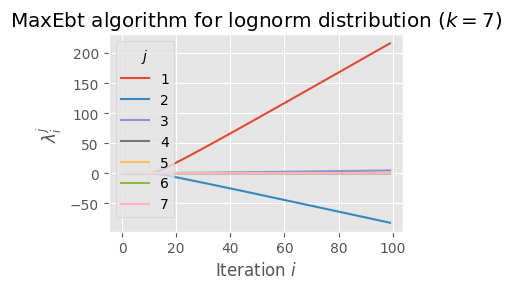

The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = -23.702
  Lambda_2 = 3.328
  Lambda_3 = -0.174
  Lambda_4 = 0.004
  Lambda_5 = -0.000
  Lambda_6 = 0.000
  Lambda_7 = -0.000
  Lambda_8 = 0.000


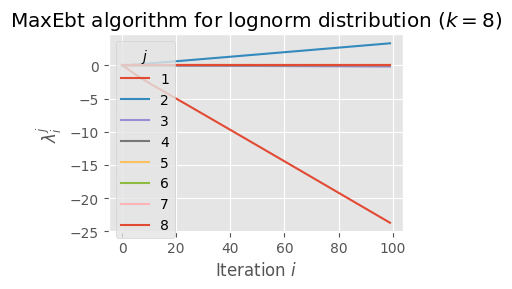

In [13]:
#Using all moments
mu = 0
s2 = 1

l = 0
k = 4
n = 350

u = lognorm.ppf(1 - 10**(-7), s=s2, loc=mu, scale=1)
print(u)

for k in [1,2,3,4,5,7,8]:
    ob_skewkurt = MaxEnt(support=[l,u],
                        n_quadrature=n,
                        b_constraints=b_SkewKurt_lognormal(mu,s2,k),
                        f_vector=f_SkewKurt,
                        f_param=[k])
    if ob_skewkurt._converges:
        ob_skewkurt.visualize_solution(xlim=[l,l+10],
                                    actual_density=pdf_lognorm,
                                    actual_param=[mu,s2], 
                                    title=f"MaxEnt density for lognorm distribution ($k={k}$)")
        print(f"Lagrange parameters: {ob_skewkurt.get_la()}")
    else:
        ob_skewkurt.visualize_algorithm(title=f"MaxEbt algorithm for lognorm distribution ($k={k}$)")

In [25]:
#standardized moments
mu = 0
s2 = 1

l = -mean_lognorm(mu,s2)/np.sqrt(var_lognorm(mu, s2))
u = l + lognorm.ppf(0.999, s=s2, loc=mu, scale=1)


ns = [40,100,200,360]

for n in ns:
    for i in range(3,12):
        u = l + ( lognorm.ppf(1 - 10**-i, s=s2, loc=mu, scale=1) - mean_lognorm(mu,s2) )/np.sqrt(var_lognorm(mu, s2))
        print(l,u)
        ob_skewkurt = MaxEnt(support=[l,u],
                            n_quadrature=n,
                            b_constraints=b_SkewKurt_lognormal_standardized(mu,s2),
                            f_vector=f_SkewKurt,
                            warning_convergence=False)
        if ob_skewkurt._converges:
            print("yes!")

# ob_skewkurt = MaxEnt(support=[l,u],
#                      n_quadrature=n,
#                      b_constraints=b_SkewKurt_lognormal_standardized(mu,s2),
#                      f_vector=f_SkewKurt)
# ob_skewkurt.visualize_algorithm()
# ob_skewkurt.visualize_solution(xlim=[l,l+10],
#                              actual_density=pdf_lognorm,
#                              actual_param=[mu,s2], 
#                              title="ME density for lognorm distribution",
#                              title_save="figs/viz_sol_example_lognorm.pdf")

-0.7628739783668902 8.645550517856808
-0.7628739783668902 17.548784348669205
-0.7628739783668902 31.399124261195297
yes!
-0.7628739783668902 52.13929827982339
yes!
-0.7628739783668902 82.2945464604668
yes!
-0.7628739783668902 125.1130363590865
yes!
-0.7628739783668902 184.73444672263025
yes!
-0.7628739783668902 266.3915819404027
yes!
-0.7628739783668902 376.6506379286109
yes!
-0.7628739783668902 8.645550517856808
-0.7628739783668902 17.548784348669205
-0.7628739783668902 31.399124261195297
yes!
-0.7628739783668902 52.13929827982339
yes!
-0.7628739783668902 82.2945464604668
yes!
-0.7628739783668902 125.1130363590865
yes!
-0.7628739783668902 184.73444672263025
yes!
-0.7628739783668902 266.3915819404027
yes!
-0.7628739783668902 376.6506379286109
yes!
-0.7628739783668902 8.645550517856808
-0.7628739783668902 17.548784348669205
-0.7628739783668902 31.399124261195297
yes!
-0.7628739783668902 52.13929827982339
yes!
-0.7628739783668902 82.2945464604668
yes!
-0.7628739783668902 125.113036359086

-4.0551999668446745 28.151865242914788
The resulting parameters:
  Lambda_1 = -0.277
  Lambda_2 = -0.810
  Lambda_3 = 0.121
  Lambda_4 = -0.005


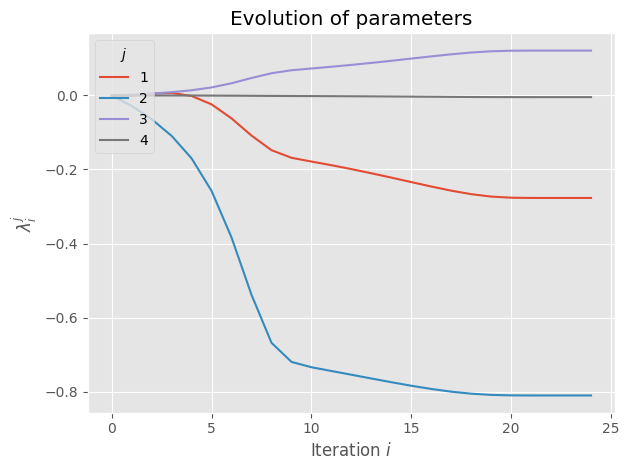

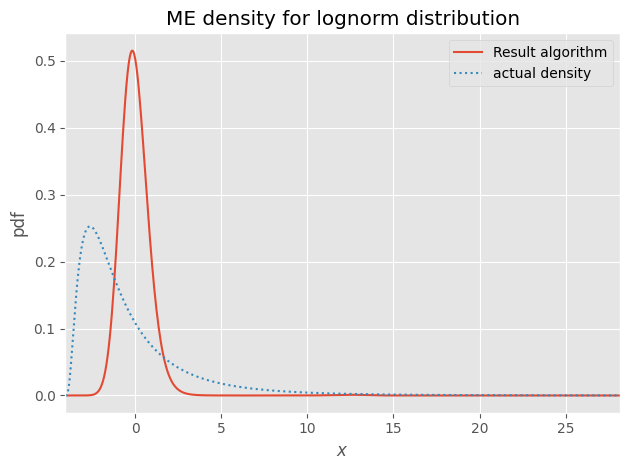

In [94]:
#standardized moments
mu = 1
s2 = .8

l = -np.exp(mu+s2/2)
u = l + lognorm.ppf(0.999, s=s2, loc=0, scale=np.exp(mu))
print(l,u)
n = 360

ob_skewkurt = MaxEnt(support=[l,u],
                     n_quadrature=n,
                     b_constraints=b_SkewKurt_lognormal_standardized(mu,s2),
                     f_vector=f_SkewKurt,
                     k_max=200)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution(
                             actual_density=pdf_lognorm,
                             actual_param=[mu,s2], 
                             title="ME density for lognorm distribution",
                             title_save="figs/viz_sol_example_lognorm.pdf")